In [3]:
%load_ext line_profiler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import preprocessing
import sklearn.linear_model as lm
# import src.random_matrix as rm
# import src.stat_arb as sa
# import src.dr as dr
import statsmodels.api as sm
import math
import importlib
import os

PATH = 'data/'
plt.rc('font', family='serif')

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [4]:
df = pd.read_pickle('{}/log_returns_cleaned.pkl'.format(PATH))

# Remove stocks that have less than 99% clean data
df = df.dropna(thresh=len(df)*.99, axis=1)
# Remove days with NAs
df = df.dropna(axis=0)

# Remove ETFs
spy = df['SPY']
df = df.drop('SPY', axis=1)
df = df.drop(['SPY', 'IWM', 'EEM', 'TLT', 'USO', 'GLD', 'XLF', 'XLB', 'XLK', 'XLV', 'XLI', 'XLU', 'XLY', 'XLP', 'XLE'], axis=1, errors='ignore')

# Fit OLS to get betas - subtract mkt correlation. Technically this is lookahead bias but we observe the betas change very little anyway.
pred = pd.DataFrame(lm.LinearRegression(fit_intercept=False).fit(spy.values.reshape(-1,1), df.values).predict(spy.values.reshape(-1, 1)), 
                    index=df.index, columns=df.columns.values)
df_excess = df - pred

In [5]:
df_500_ = pd.read_pickle('{}/cleaned_multi.pkl'.format(PATH))
df_500_ = df_500_['volume'].loc[:,df.columns.values,:].unstack(1).mean().sort_values()[-500:]

df_500 = df_excess.loc[:, df_500_.index.values]
df_500

ticker,MTB,WRI,PVH,AVB,SLG,TTI,ARW,RJF,EV,ELY,...,ORCL,EBAY,F,GE,CSCO,INTC,MSFT,BAC,AAPL,IRM
date,,,,,,,,,,,,,,,,,,,,,
2000-03-29,0.016073,-0.001092,0.050644,0.011097,0.016745,0.008833,-0.063188,0.001553,0.006298,-0.008979,...,-0.049340,-0.118784,0.005798,0.042740,-0.024887,-0.029800,0.026096,-0.031223,-0.024312,0.008528
2000-03-30,0.002411,0.022952,0.009393,0.012279,-0.001725,0.094649,-0.022055,0.012811,0.039405,0.001538,...,-0.029736,0.060917,0.059240,-0.007566,-0.010733,-0.016437,-0.018381,0.003313,-0.059375,0.008659
2000-03-31,-0.004412,-0.011925,0.029579,-0.003653,-0.019664,0.011745,0.029158,0.023048,0.030100,-0.011725,...,-0.018672,-0.176811,-0.027952,-0.032486,0.034272,0.023948,0.015508,0.013820,0.064595,0.002806
2000-04-03,0.037012,0.000649,0.010001,-0.012249,-0.002161,-0.008582,-0.052704,-0.023861,-0.022927,-0.006028,...,-0.022465,-0.213076,0.016133,0.027475,-0.065758,-0.017295,-0.162440,0.047682,-0.024946,-0.015319
2000-04-04,-0.000972,0.019644,-0.016406,0.010378,-0.003639,-0.003075,0.054817,-0.051935,-0.056567,-0.000341,...,-0.003088,0.162646,0.051612,-0.036114,0.012226,0.025526,-0.017888,-0.012250,-0.037859,-0.005727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-17,0.005678,0.005127,-0.008575,0.007908,0.011859,-0.052776,-0.026229,0.007926,-0.009895,-0.013502,...,0.005411,-0.001947,-0.003106,-0.005672,0.015872,-0.005999,0.000161,0.003482,0.001420,-0.003629
2019-05-20,0.017427,-0.005862,-0.017671,-0.006658,-0.000661,0.024555,0.012627,0.016340,-0.004139,-0.034196,...,-0.007374,-0.001043,0.006727,-0.004663,0.002530,-0.021732,-0.007541,0.010381,-0.024489,-0.009896
2019-05-21,-0.004471,0.004079,0.013449,-0.000109,0.001691,-0.003567,0.009809,0.001124,0.060385,-0.020708,...,-0.001579,-0.010565,-0.014315,-0.001960,-0.002547,0.009163,-0.004110,-0.003885,0.009140,0.000361


The following code produces the figure for the correlation PCA choice of $k$ method used in the paper:

In [206]:
importlib.reload(dr)
importlib.reload(sa)

w = 252
cal = 5
sp = 5
strats = [sa.StArbFm(dr.Pca(pct_var=50, corr=True), cal_freq=cal, span=sp, window_len=w), \
          sa.StArbFm(dr.Pca(pct_var=75, corr=True), cal_freq=cal, span=sp, window_len=w), \
          sa.StArbFm(dr.Pca(pct_var=95, corr=True), cal_freq=cal, span=sp, window_len=w), \
          sa.StArbFm(dr.Pca(rmt=True, corr=True), cal_freq=cal, span=sp, window_len=w)]

sa.backtest(df_500, strats, df_excess, benchmark=spy, it=1000)
# %lprun -f dr.RPca.fit backtest(df_500, strats, df_excess, benchmark=spy)

Registered Corr_pca_252


KeyboardInterrupt: 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

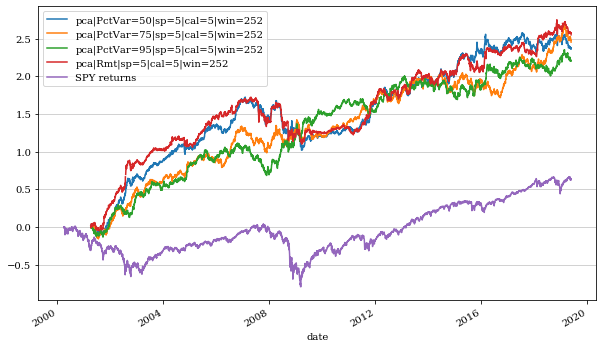

In [158]:
plot_drawdowns(strats, spy, save=True)

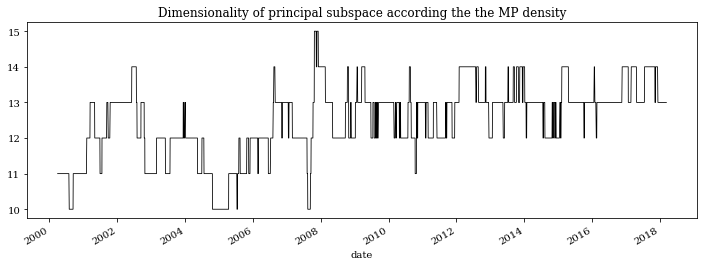

In [143]:
# pcs_df = pd.concat([pd.DataFrame(strat.n_pcs, index=df.index, columns=[strat.id]) for strat in strats], axis=1)
pcs_df = pd.DataFrame(strats[-1].n_pcs, index=df.index, columns=[strats[-1].id])
pcs_df.iloc[:-300].plot(figsize=(12, 4), c='k', legend=False, linewidth=.8)
plt.title('Dimensionality of principal subspace according the the MP density')
plt.savefig('n_pcs_mp.eps', format='eps', dpi=1200, bbox_inches='tight')

In [40]:
pcs_df = pd.DataFrame(rpca.n_pcs, index=df_500.index, columns=[rpca.id])#pd.concat([pd.DataFrame(strat.n_pcs, index=df.index, columns=[strat.id]) for strat in strats], axis=1)
pcs_df.iloc[:-300].plot(figsize=(10, 6))
plt.savefig('dim_rpca.png')

NameError: name 'rpca' is not defined

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

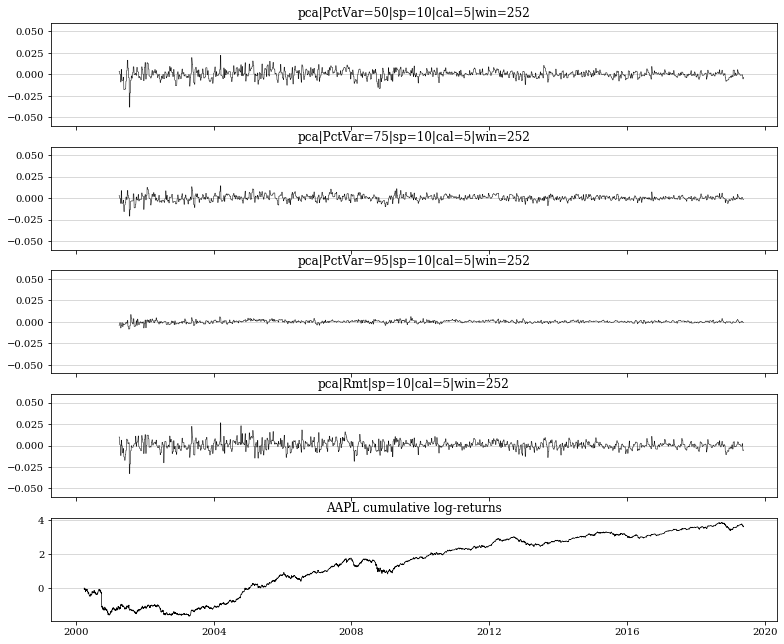

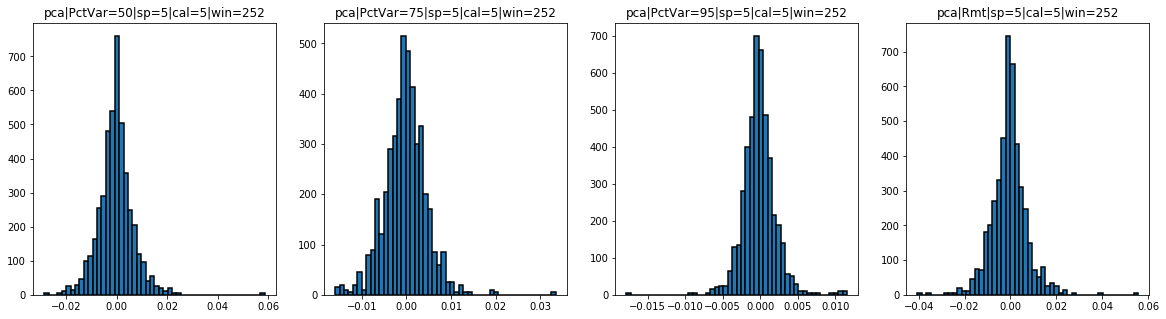

In [117]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for ix, strat in enumerate(strats):
    axs[ix].hist(strat.portfolios['AAPL'], bins=50, linewidth=1.5, edgecolor='black')
    axs[ix].set_title(strat.id)


Registered RPca_252
Iteration: 300
Iteration: 400
Iteration: 500
Iteration: 600
Iteration: 700
Iteration: 800
Iteration: 900
Iteration: 1000
Iteration: 1100
Iteration: 1200
Iteration: 1300
Iteration: 1400
Iteration: 1500
Iteration: 1600
Iteration: 1700
Iteration: 1800
Iteration: 1900
Iteration: 2000
Iteration: 2100
Iteration: 2200
Iteration: 2300
Iteration: 2400
Iteration: 2500
Iteration: 2600
Iteration: 2700
Iteration: 2800
Iteration: 2900
Iteration: 3000
Iteration: 3100
Iteration: 3200
Iteration: 3300
Iteration: 3400
Iteration: 3500
Iteration: 3600
Iteration: 3700
Iteration: 3800
Iteration: 3900
Iteration: 4000
Iteration: 4100
Iteration: 4200
Iteration: 4300
Iteration: 4400
Iteration: 4500
Iteration: 4600
Iteration: 4700
Iteration: 4800


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

[RPca|sp=5|cal=5|win=252    0.25
dtype: float64, array([0.10718681])]


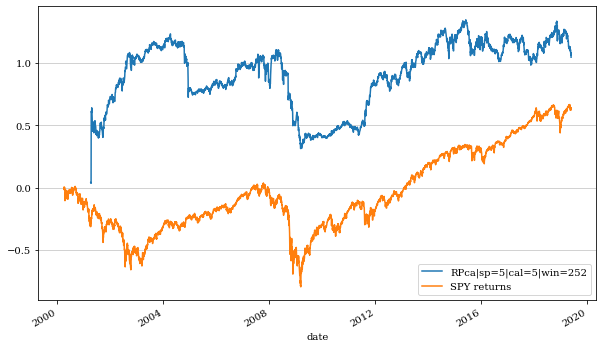

In [178]:
strats = [sa.StArbFm(dr.RPca(), cal_freq=5, window_len=w),]
backtest(df_500, strats, df_excess, benchmark=spy, it=100)

,0
count,4813.000000
mean,238.634116
std,56.449690
min,0.000000
25%,252.000000
50%,252.000000
75%,252.000000
max,252.000000


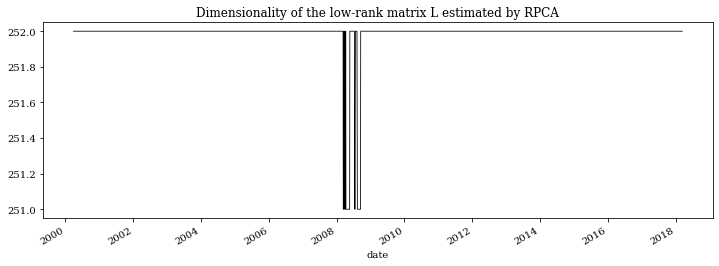

In [197]:
pcs_df = pd.DataFrame(strats[0].n_pcs, index=df.index, columns=[strats[0].id])
pcs_df.iloc[:-300].plot(figsize=(12, 4), c='k', legend=False, linewidth=.8)
plt.title('Dimensionality of the low-rank matrix L estimated by RPCA')
plt.savefig('dim_L_rpca.eps', format='eps', dpi=1200, bbox_inches='tight')

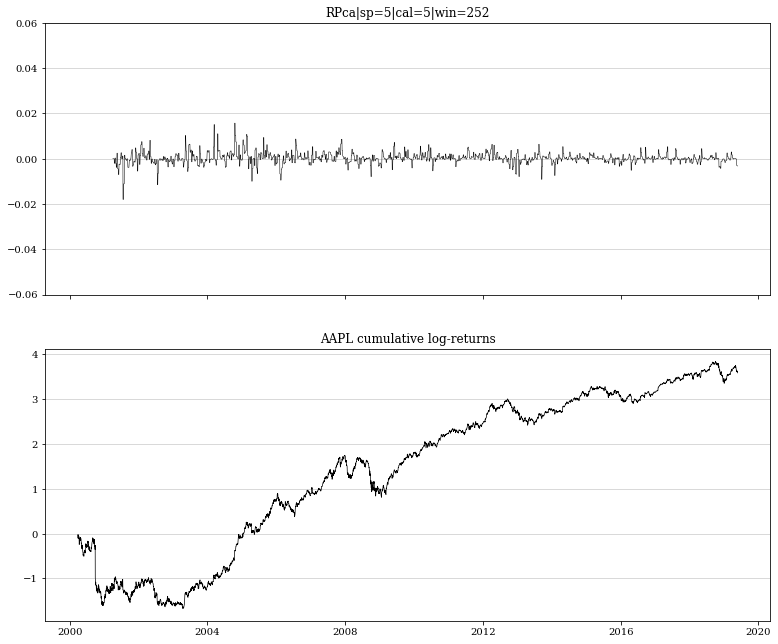

In [180]:
fig, ax = plt.subplots(len(strats) + 1, 1, sharex=True, figsize=(13, 11))
for ix, strat in enumerate(strats):
    ax[ix].set_ylim(-0.06, 0.06)
    ax[ix].plot(-1 * strat.portfolios['AAPL'], label=strat.id, c='k', linewidth=.5)
    ax[ix].grid(axis='y', alpha=.6)
    ax[ix].set_title(strat.id)
ax[-1].plot(df['AAPL'].cumsum(), c='k', lw=.7)
ax[-1].set_title('AAPL cumulative log-returns')
# plt.savefig('aapl_resid.eps', format='eps', rasterized=True, dpi=1200, bbox_inches='tight')

In [199]:
rpca = strats[0]
strats[0].lr.hist(bins=50, edgecolor='k', color='white')
plt.grid(alpha=.7)
strats[0].lr.describe()
rpca

AttributeError: 'StArbFm' object has no attribute 'lr'

Registered SPca_alpha=0.1_252
Iteration: 1000
Iteration: 2000
Iteration: 3000
Iteration: 4000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

[SPca|alpha=0.1|sp=5|cal=5|win=252    0.36
dtype: float64, array([0.06224732])]


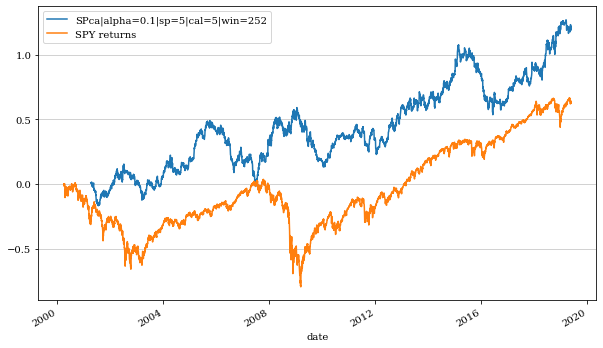

In [200]:
strats = [sa.StArbFm(dr.SPca(alpha=0.1), cal_freq=cal, span=sp, window_len=w),]
backtest(df_500, strats, df_excess, benchmark=spy, it=1000)

Text(0.5, 1.0, 'Dimensionality of principal subspace according the the MP density')

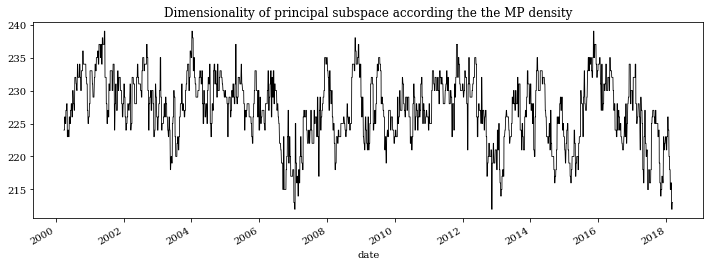

In [201]:
pcs_df = pd.DataFrame(strats[0].n_pcs, index=df.index, columns=[strats[0].id])
pcs_df.iloc[:-300].plot(figsize=(12, 4), c='k', legend=False, linewidth=.8)
plt.title('Dimensionality of principal subspace according the the MP density')

The following cell contains code for simulating a dataset to show that the method is able to recover the residual in a simulated case where we know what the residual should be:

In [ ]:
n = df.shape[0]
p = df.shape[1]
residuals = sm.tsa.arma_generate_sample(ar=[1], ma=[1, -0.95], nsample=(n, p))
# residuals = np.random.normal(0,1,size=(n,p))

# Gaussian returns + mean reverting residuals.
test_prices = np.array([np.random.normal(0,1) * np.ones(p) for i in range(n)]) + residuals
test_prices = pd.DataFrame(test_prices, index=df.index, columns=df.columns.values)
test_prices['AAPL'].plot()

In [ ]:
rand = pd.DataFrame(np.random.normal(size=df.shape), index=df.index, columns=df.columns)
backtest(rand, strats, df_excess, benchmark=spy)

In [21]:
# def bt(df_lr, df_exc=None, benchmark=None):
#     pca = PCA(n_components=0.50)
#     returns = np.zeros(len(df_lr))
#     i = 0
#     for index, row in df_lr.iloc[60:].iterrows():
#         ix = df_lr.index.get_loc(index)
#         window = df_lr.iloc[ix-60:ix]
#         fr = pca.fit_transform(window)
#         models = lm.LinearRegression(fit_intercept=False).fit(fr, window)
#         weights = -(window - models.predict(fr)).ewm(span=5).mean().iloc[-1]
#         returns[i] = weights.values.dot(row.values)
#         if i % 500 == 0: print(i)
#         i+= 1
#     return returns
# r = bt(df, df_excess, benchmark=spy)
from scipy import stats

def bt(df_lr, df_exc=None, benchmark=None):
    scaler = StandardScaler()
    pca = PCA(n_components=0.50)
    corr_pca = Pipeline([('s', scaler), ('pca', pca)])
    returns = np.zeros(len(df_lr))
    i = 0
    for index, row in df_lr.iloc[60:].iterrows():
        ix = df_lr.index.get_loc(index)
        window = df_lr.iloc[ix-60:ix]
        win_cen = pd.DataFrame(scale(window, with_mean=True, with_std=False),
                               index=window.index, columns=window.columns.values)
        fr = pca.fit_transform(win_cen)
#         fr = np.matmul(window.values, pca.components_.T)
        models = lm.LinearRegression(fit_intercept=False).fit(fr, win_cen)
        weights = -1 * (win_cen - models.predict(fr)).ewm(span=5).mean().iloc[-1]
        returns[i] = weights.values.dot(row.values)
        if i % 500 == 0: print(i)
        i+= 1
    print('i: {} | len(returns): {}'.format(i, len(returns)))
    return returns[:i]
rsp = bt(df, df_excess, benchmark=spy)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
i: 4753 | len(returns): 4813


pca|Rmt|sp=5|cal=5|win=60   2004-11-19
dtype: datetime64[ns]


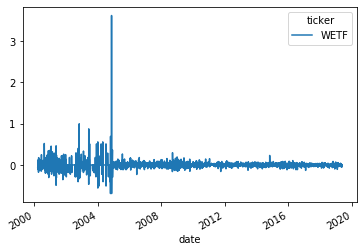

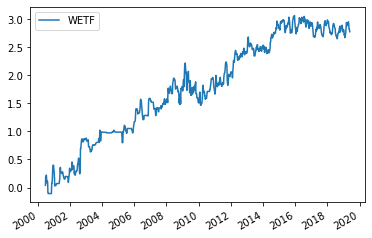

In [543]:
ix = strats[1].lr.loc['2004'].idxmax()
print(ix)
err_ticker = strats[1].portfolios.loc[ix].abs().idxmax(axis=1)
df.loc[:, err_ticker].plot()
(strats[0].portfolios.loc[:, err_ticker] * -1).cumsum().plot()